In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
feat = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [67]:
feat = feat.drop(["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"], axis=1)

In [68]:
feat

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False
...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,NaN,NaN,False


Rellenamos los valores de feat con valores promedio.

In [69]:
valores = {"CPI": feat["CPI"].mean(), "Unemployment": feat["Unemployment"].mean()}

In [70]:
feat = feat.fillna(value=valores)

Ahora vamos a hacer que los valores de false y de true seaj 0 o 1 respectivamente

In [71]:
IsHoliday_num = []
for i in feat["IsHoliday"]:
    if i == True:
        IsHoliday_num.append(1)
    elif i == False:
        IsHoliday_num.append(0)
feat["IsHoliday_num"] = IsHoliday_num
feat = feat.drop(["IsHoliday"], axis = 1)

Ahora vamos a ver la tabla:

In [72]:
feat

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_num
0,1,2010-02-05,42.31,2.572,211.096358,8.106000,0
1,1,2010-02-12,38.51,2.548,211.242170,8.106000,1
2,1,2010-02-19,39.93,2.514,211.289143,8.106000,0
3,1,2010-02-26,46.63,2.561,211.319643,8.106000,0
4,1,2010-03-05,46.50,2.625,211.350143,8.106000,0
...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,172.460809,7.826821,0
8186,45,2013-07-05,77.50,3.614,172.460809,7.826821,0
8187,45,2013-07-12,79.37,3.614,172.460809,7.826821,0
8188,45,2013-07-19,82.84,3.737,172.460809,7.826821,0


Ahora vamos a cambiar el tipo de la siguiente tabla:

In [73]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [74]:
Type_num = []
for i in stores["Type"]:
    if i == "A":
        Type_num.append(0)
    if i == "B":
        Type_num.append(1)
    if i == "C":
        Type_num.append(2)
stores["Type_num"] = Type_num
stores = stores.drop(["Type"], axis = 1)

In [114]:
stores

,Store,Size,Type_num
0,1,151315,0
1,2,202307,0
2,3,37392,1
3,4,205863,0
4,5,34875,1
5,6,202505,0
6,7,70713,1
7,8,155078,0
8,9,125833,1
9,10,126512,1


Ya hemos realizado los cambios correctos, ahora mejoremos la tabla train para poder comenzar a modelar los datos.

In [75]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


Primero vamos a particionar los datos por teindas, es decir vamos a crear una lista de tablas indexadas por el número de tienda:

In [76]:
def list_store_rows(df):
    lista = []
    for i in range(1,46):
        lista.append(df.loc[df["Store"] == i])
    return(lista)

In [77]:
lista_aux = list_store_rows(train)
print(len(lista_aux))

45


In [93]:
for i in range(len(lista_aux)):
    lista_aux[i]["Type_num"] = i
    lista_aux[i]["Size"] = stores["Size"][i]

C:\Users\rodri\AppData\Local\Temp\ipykernel_15772\1911272935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_aux[i]["Type_num"] = i
C:\Users\rodri\AppData\Local\Temp\ipykernel_15772\1911272935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_aux[i]["Size"] = stores["Size"][i]


In [117]:
lista_aux[40]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type_num,Size
380972,41,1,2010-02-05,16971.05,False,40,196321
380973,41,1,2010-02-12,30204.01,True,40,196321
380974,41,1,2010-02-19,20694.24,False,40,196321
380975,41,1,2010-02-26,12816.16,False,40,196321
380976,41,1,2010-03-05,15154.51,False,40,196321
...,...,...,...,...,...,...,...
391055,41,99,2012-09-14,0.10,False,40,196321
391056,41,99,2012-09-21,0.08,False,40,196321
391057,41,99,2012-10-05,934.88,False,40,196321
391058,41,99,2012-10-12,230.03,False,40,196321


In [96]:
for i in lista_aux:
    val = True
    if len(i.columns) == 7:
        val *= True
    else:
        val *= False
print(val)

1


Ya les pusimos a la tabla de entrenamiento los valores de la tabla de stores, ahora solo falta ponerle a las tablas de entrenamiento particionadas los datos de feat:

In [118]:
for i in lista_aux:
    i["Temperature"]  = 0
    i["Fuel_Price"]   = 0
    i["CPI"]          = 0
    i["Unemployment"] = 0

C:\Users\rodri\AppData\Local\Temp\ipykernel_15772\4279273929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i["Temperature"]  = 0
C:\Users\rodri\AppData\Local\Temp\ipykernel_15772\4279273929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i["Fuel_Price"]   = 0
C:\Users\rodri\AppData\Local\Temp\ipykernel_15772\4279273929.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [119]:
lista_aux[0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type_num,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,0,151315,0,0,0,0
1,1,1,2010-02-12,46039.49,True,0,151315,0,0,0,0
2,1,1,2010-02-19,41595.55,False,0,151315,0,0,0,0
3,1,1,2010-02-26,19403.54,False,0,151315,0,0,0,0
4,1,1,2010-03-05,21827.90,False,0,151315,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10239,1,99,2012-08-31,20.06,False,0,151315,0,0,0,0
10240,1,99,2012-09-07,0.05,True,0,151315,0,0,0,0
10241,1,99,2012-09-14,0.03,False,0,151315,0,0,0,0
10242,1,99,2012-10-05,635.00,False,0,151315,0,0,0,0


In [146]:
for j,k in zip(lista_aux[0]["Date"], lista_aux[0].index.to_list()):
        busq = feat[(feat["Date"] == j) & (feat["Store"] == i)]
        temp = busq["Temperature"][busq.index[0]]
        fp = busq["Fuel_Price"][busq.index[0]]
        cpi = busq["CPI"][busq.index[0]]
        unemp = busq["Unemployment"][busq.index[0]]
        lista_aux[0].at[k, "Temperature"] = temp
        lista_aux[0].at[k, "Fuel_Price"] = fp
        lista_aux[0].at[k, "CPI"] = cpi
        lista_aux[0].at[k, "Unemployment"] = unemp

C:\Users\rodri\AppData\Local\Temp\ipykernel_15772\3644344031.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_aux[0].at[k, "Temperature"] = temp
C:\Users\rodri\AppData\Local\Temp\ipykernel_15772\3644344031.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_aux[0].at[k, "Fuel_Price"] = fp
C:\Users\rodri\AppData\Local\Temp\ipykernel_15772\3644344031.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [147]:
lista_aux[0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type_num,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,0,151315,22.43,2.954,131.527903,8.326
1,1,1,2010-02-12,46039.49,True,0,151315,25.94,2.940,131.586613,8.326
2,1,1,2010-02-19,41595.55,False,0,151315,31.05,2.909,131.637000,8.326
3,1,1,2010-02-26,19403.54,False,0,151315,33.98,2.910,131.686000,8.326
4,1,1,2010-03-05,21827.90,False,0,151315,36.73,2.919,131.735000,8.326
...,...,...,...,...,...,...,...,...,...,...,...
10239,1,99,2012-08-31,20.06,False,0,151315,71.18,4.026,138.377194,8.953
10240,1,99,2012-09-07,0.05,True,0,151315,72.81,4.076,138.472936,8.953
10241,1,99,2012-09-14,0.03,False,0,151315,64.28,4.088,138.567300,8.953
10242,1,99,2012-10-05,635.00,False,0,151315,60.35,4.151,138.825600,8.693


In [150]:
for i in range(1,len(lista_aux)):
    print("Estoy iniciando con la tabla:", i+1)
    for j,k in zip(lista_aux[i]["Date"], lista_aux[i].index.to_list()):
        busq = feat[(feat["Date"] == j) & (feat["Store"] == i)]
        temp = busq["Temperature"][busq.index[0]]
        fp = busq["Fuel_Price"][busq.index[0]]
        cpi = busq["CPI"][busq.index[0]]
        unemp = busq["Unemployment"][busq.index[0]]
        lista_aux[i].at[k, "Temperature"] = temp
        lista_aux[i].at[k, "Fuel_Price"] = fp
        lista_aux[i].at[k, "CPI"] = cpi
        lista_aux[i].at[k, "Unemployment"] = unemp

Estoy iniciando con la tabla: 2
Estoy iniciando con la tabla: 3
Estoy iniciando con la tabla: 4
Estoy iniciando con la tabla: 5
Estoy iniciando con la tabla: 6
Estoy iniciando con la tabla: 7
Estoy iniciando con la tabla: 8
Estoy iniciando con la tabla: 9
Estoy iniciando con la tabla: 10
Estoy iniciando con la tabla: 11
Estoy iniciando con la tabla: 12
Estoy iniciando con la tabla: 13
Estoy iniciando con la tabla: 14
Estoy iniciando con la tabla: 15


C:\Users\rodri\AppData\Local\Temp\ipykernel_15772\3476371884.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_aux[i].at[k, "Temperature"] = temp
C:\Users\rodri\AppData\Local\Temp\ipykernel_15772\3476371884.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_aux[i].at[k, "Fuel_Price"] = fp
C:\Users\rodri\AppData\Local\Temp\ipykernel_15772\3476371884.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

Estoy iniciando con la tabla: 16
Estoy iniciando con la tabla: 17
Estoy iniciando con la tabla: 18
Estoy iniciando con la tabla: 19
Estoy iniciando con la tabla: 20
Estoy iniciando con la tabla: 21
Estoy iniciando con la tabla: 22
Estoy iniciando con la tabla: 23
Estoy iniciando con la tabla: 24
Estoy iniciando con la tabla: 25
Estoy iniciando con la tabla: 26
Estoy iniciando con la tabla: 27
Estoy iniciando con la tabla: 28
Estoy iniciando con la tabla: 29
Estoy iniciando con la tabla: 30
Estoy iniciando con la tabla: 31
Estoy iniciando con la tabla: 32
Estoy iniciando con la tabla: 33
Estoy iniciando con la tabla: 34
Estoy iniciando con la tabla: 35
Estoy iniciando con la tabla: 36
Estoy iniciando con la tabla: 37
Estoy iniciando con la tabla: 38
Estoy iniciando con la tabla: 39
Estoy iniciando con la tabla: 40
Estoy iniciando con la tabla: 41
Estoy iniciando con la tabla: 42
Estoy iniciando con la tabla: 43
Estoy iniciando con la tabla: 44
Estoy iniciando con la tabla: 45


<AxesSubplot:xlabel='Date'>

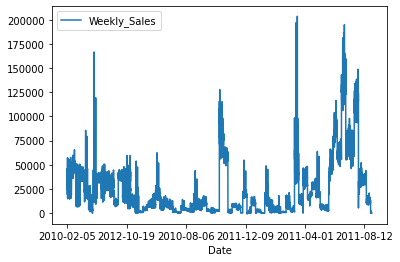

In [181]:
lista_aux[0].plot(x = "Date", y = "Weekly_Sales")

Y ahora tenemos listas las tablas para poder predecir c:<, pero antes vamos a tener que partir los datos por tienda en datos de entrenamiento, de validación y de testeo.

In [344]:
lista_dat = []
#Vamos a particionar, para ello usemos scikitlearn
from sklearn.model_selection import train_test_split

for i in lista_aux:
    X_i, Y_i = i.loc[:, i.columns != "Weekly_Sales"],i.loc[:, i.columns == "Weekly_Sales"]
    X_i1 = X_i.drop("Date", axis = 1)
    X_i1, Y_i1 = X_i1.to_numpy(), Y_i.to_numpy()
    for i in range(len(X_i1[:,2])):
        if X_i1[i,2] == False:
            X_i1[i,2] = 0
        elif X_i1[i,2] == True:
            X_i1[i,2] = 1
    X_i_train, X_i_test, Y_i_train, Y_i_test = train_test_split(X_i1,Y_i1,train_size=0.8,random_state = 42,shuffle = True)
    lista_dat.append([[X_i_train[..., np.newaxis].astype(np.float32), Y_i_train[..., np.newaxis].astype(np.float32)],
                      [X_i_test[..., np.newaxis].astype(np.float32), Y_i_test[..., np.newaxis].astype(np.float32)]])

In [345]:
print(lista_dat[0][0][0].shape, lista_dat[0][0][1].shape,lista_dat[0][1][0].shape, lista_dat[0][1][1].shape)

(8195, 9, 1) (8195, 1, 1) (2049, 9, 1) (2049, 1, 1)


Ya tenemos los datos de entrenamiento y de testeo en lista_dat, asumakina, ahora construyamos 45 modelos :s

In [361]:
from tensorflow.keras.layers import LSTM, TimeDistributed, Dense, BatchNormalization, Dropout, SimpleRNN, Activation
from tensorflow.keras import Sequential
from tensorflow import keras

In [378]:
def arch_model_001():
    Model = Sequential([
        BatchNormalization(),
        Dropout(0.4),
        Dense(300),
        Activation("relu"),
        Dense(200),
        Activation("relu"),
        Dense(100),
        Activation("relu"),
        Dense(1)
    ])
    return(Model)
def arch_model_002():
    Model = Sequential([
        LSTM(80, return_sequences = True, input_shape = [None, 1]),
        LSTM(70, return_sequences = True, input_shape = [None, 1]),
        LSTM(60, return_sequences = True, input_shape = [None, 1]),
        LSTM(50, return_sequences = True, input_shape = [None, 1]),
        LSTM(40, return_sequences = True, input_shape = [None, 1]),
        LSTM(30),
        Dense(1)
    ])
    return(Model)

In [379]:
modelos_1 = []
eta = 0.1
for i in range(45):
    model_i1 = arch_model_002()
    modelos_1.append(model_i1)
opt = keras.optimizers.Adam(learning_rate=eta)
for i in modelos_1:
    i.compile(loss = "MSE", metrics = ["accuracy"], optimizer = opt)

In [380]:
modelos_1[0].fit(lista_dat[0][0][0], lista_dat[0][0][1], epochs = 100, validation_split=0.2)

Epoch 1/100
205/205 [==============================] - 10s 16ms/step - loss: 1238623232.0000 - accuracy: 1.5253e-04 - val_loss: 1269328256.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
205/205 [==============================] - 2s 9ms/step - loss: 1213440128.0000 - accuracy: 1.5253e-04 - val_loss: 1244583680.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
205/205 [==============================] - 2s 9ms/step - loss: 1189351296.0000 - accuracy: 1.5253e-04 - val_loss: 1220978048.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
205/205 [==============================] - 2s 9ms/step - loss: 1166215552.0000 - accuracy: 1.5253e-04 - val_loss: 1198306304.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
205/205 [==============================] - 2s 9ms/step - loss: 1143949696.0000 - accuracy: 1.5253e-04 - val_loss: 1176596096.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
205/205 [==============================] - 2s 8ms/step - loss: 1122546304.0000 - accuracy: 1.5253e-04 - val_loss: 1155542400.0000 - val_accur

Hay que hacer un ajuste a la selección de los datos pues no puedo alcanzar una mayor precisión, la razón puede ser en el "shuffle" que no es suficiente al elegir los datos de entrenamiento, hay que tomar muestras significativas de los datos de cada tienda, no obstante este es un primer proyecto de largo alcance, espero mejorar.